In [3]:
import pandas as pd
import numpy as np

# Replace this path with your actual CSV path
csv_path = "/content/mena_opportunity_tea_updated.csv"

# Load the data
df = pd.read_csv(csv_path)

# Quick checks
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Column info
df.info()

# Summary statistics (numeric)
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
print(df['Churn'].value_counts())  # change to your target name if different


Churn
No     5174
Yes    1869
Name: count, dtype: int64


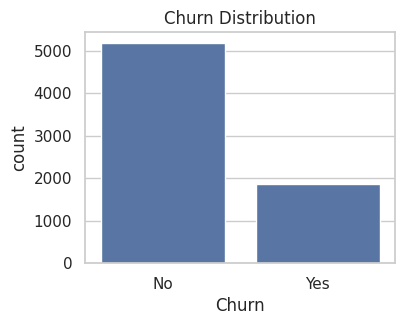

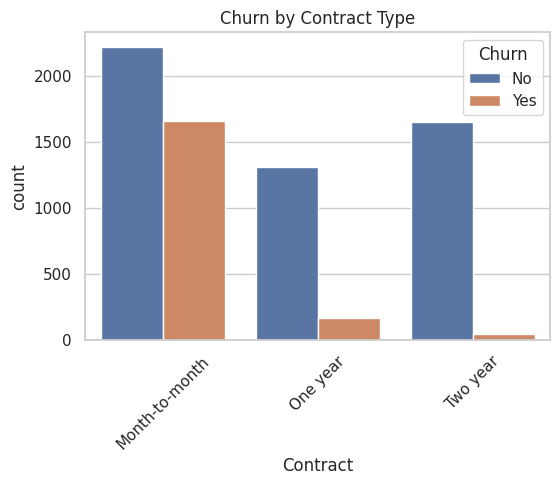

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Target distribution
plt.figure(figsize=(4,3))
sns.countplot(x='Churn', data=df)   # use your target column
plt.title("Churn Distribution")
plt.show()

# Example: churn by contract type (if you have this column)
if 'Contract' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Contract', hue='Churn', data=df)
    plt.xticks(rotation=45)
    plt.title("Churn by Contract Type")
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()

# Example: drop customer ID column if present
for col in ['customerID', 'CustomerId', 'customer_id']:
    if col in df_model.columns:
        df_model = df_model.drop(columns=[col])

# Separate features and target
target_col = 'Churn'   # change if your target name is different
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

# Encode target if it is Yes/No or similar
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)   # churn=1, no churn=0 (typically)

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((5634, 19), (1409, 19))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve
import xgboost as xgb


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

log_reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(
        max_iter=2000,      # increased iterations
        solver='lbfgs'      # default solver, works well for many cases
    ))
])

log_reg_pipe.fit(X_train, y_train)

y_pred_lr = log_reg_pipe.predict(X_test)
y_prob_lr = log_reg_pipe.predict_proba(X_test)[:, 1]

print("Logistic Regression (scaled):")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression (scaled):
Accuracy: 0.7963094393186657
Recall: 0.5267379679144385
ROC-AUC: 0.8389160143635847


In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest:
Accuracy: 0.7877927608232789
Recall: 0.48663101604278075
ROC-AUC: 0.8242359657960682


In [13]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBoost:
Accuracy: 0.7856635911994322
Recall: 0.5026737967914439
ROC-AUC: 0.8295926012038544


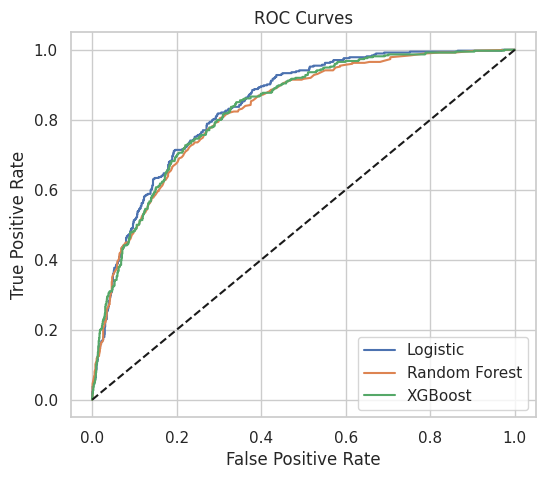

In [14]:
plt.figure(figsize=(6,5))

for name, y_prob in [
    ("Logistic", y_prob_lr),
    ("Random Forest", y_prob_rf),
    ("XGBoost", y_prob_xgb),
]:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()
